In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [4]:
iris = load_iris()

In [6]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['class'] = iris.target

In [7]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
del data["petal length (cm)"]
del data["petal width (cm)"]
data

,sepal length (cm),sepal width (cm),class
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [9]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.2)

In [10]:
data_train

,sepal length (cm),sepal width (cm),class
108,6.7,2.5,2
36,5.5,3.5,0
6,4.6,3.4,0
80,5.5,2.4,1
60,5.0,2.0,1
...,...,...,...
89,5.5,2.5,1
90,5.5,2.6,1
35,5.0,3.2,0
17,5.1,3.5,0


In [11]:
data_test

,sepal length (cm),sepal width (cm),class
144,6.7,3.3,2
72,6.3,2.5,1
63,6.1,2.9,1
33,5.5,4.2,0
84,5.4,3.0,1
131,7.9,3.8,2
110,6.5,3.2,2
39,5.1,3.4,0
68,6.2,2.2,1
124,6.7,3.3,2


In [12]:
y_train, y_test = data_train['class'], data_test['class']
del data_train['class']
del data_test['class']

In [13]:
data_train

,sepal length (cm),sepal width (cm)
108,6.7,2.5
36,5.5,3.5
6,4.6,3.4
80,5.5,2.4
60,5.0,2.0
...,...,...
89,5.5,2.5
90,5.5,2.6
35,5.0,3.2
17,5.1,3.5


In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [15]:
lda = LinearDiscriminantAnalysis()

In [16]:
lda.fit(data_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [17]:
lda.predict(data_test)

array([2, 2, 1, 0, 1, 2, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 0, 2, 0,
       2, 0, 2, 1, 1, 0, 0, 2])

In [18]:
result = pd.DataFrame([y_test.values, lda.predict(data_test)]).T

In [19]:
result

,0,1
0,2,2
1,1,2
2,1,1
3,0,0
4,1,1
5,2,2
6,2,2
7,0,0
8,1,2
9,2,2


In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(y_test, lda.predict(data_test))

0.8

In [22]:
lda.coef_

array([[-5.53065092,  8.07878445],
       [ 1.59359088, -3.74167965],
       [ 4.17982186, -4.65546092]])

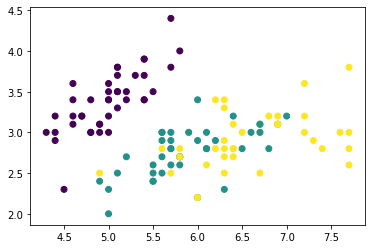

In [24]:
plt.scatter(data_train["sepal length (cm)"], data_train["sepal width (cm)"], c=y_train)
plt.show()

In [25]:
small_train = data_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[["sepal length (cm)", "sepal width (cm)"]]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = data_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[["sepal length (cm)", "sepal width (cm)"]]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

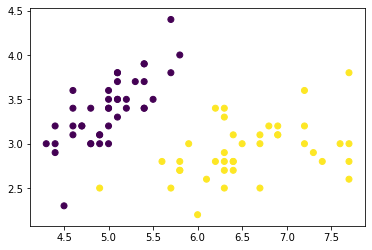

In [26]:
plt.scatter(small_train["sepal length (cm)"], small_train["sepal width (cm)"], c=sy_train)
plt.show()

In [27]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [28]:
lda_small.means_

array([[4.99756098, 3.3902439 ],
       [6.56923077, 2.92051282]])

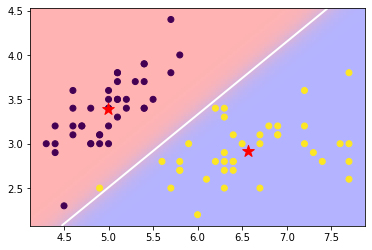

In [29]:
plt.scatter(small_train["sepal length (cm)"], small_train["sepal width (cm)"], c=sy_train)
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()

In [30]:
lda_small.coef_

array([[  9.16176531, -11.16472874]])

In [31]:
accuracy_score(sy_test, lda_small.predict(small_test))

1.0

In [32]:
del data['class']

In [33]:
data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [35]:
from sklearn.cluster import KMeans

In [39]:
kmeans = KMeans(n_clusters = 3)
clusters = kmeans.fit_predict(data)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [41]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data)
    k_inertia.append(clf_kmeans.inertia_)

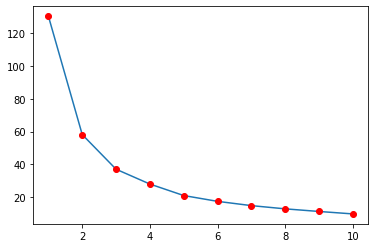

In [42]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')